<a href="https://colab.research.google.com/github/rohailkhan/deep_learning/blob/master/Objective_1_for_Time_Invariant_Aging_Model_and_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:


# بسم الله الرحمن الرحيم
اللهم صل على محمد وعلى آل محمد كما صليت على إبراهيم وعلى آل إبراهيم إنك حميد مجيد، اللهم بارك على محمد وعلى آل محمد كما باركت على إبراهيم وعلى آل إبراهيم إنك حميد مجيد




In [0]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Ovjective-1
## Applying machine learning algorithm to develop a model that can successfully capture aging


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Data Preprocessing
## Putting all files into a single dataframe

In [0]:
# Put all files into a single dataframe
list_dir = [i for i in os.listdir('/content/drive/My Drive/Aging model/datafiles')]
final_df = pd.DataFrame(columns=['ID','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index','AGE'])
interim_df = pd.DataFrame(columns=['ID','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index','AGE'])
age_list=list()
for d in list_dir:
    interim_df.at[0,  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']] = pd.read_csv('/content/drive/My Drive/Aging model/datafiles/'+d, sep=" ", header=None).values[0][:7]
    interim_df['AGE'] = int(d[4:].replace('.txt','').replace('a','').replace('b',''))
    interim_df['ID'] = int(d[:3])
    final_df = pd.concat([final_df,interim_df])
    
# sort values by age of same person
final_df = final_df.sort_values(['ID','AGE'],ascending=True)

In [0]:
final_df.to_csv('/content/drive/My Drive/Aging model/new/final_df.csv',index=False)

In [0]:
final_df=pd.read_csv('/content/drive/My Drive/Aging model/new/final_df.csv')

In [11]:
final_df.head()

,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE
0,1,0.806070,0.336661,0.390837,0.828399,0.521382,0.599030,0.346350,2
1,1,0.852819,0.442643,0.386980,0.774311,0.461004,0.659254,0.393676,5
2,1,0.877282,0.404491,0.442716,0.675757,0.358158,0.306820,0.384508,8
3,1,0.883831,0.395061,0.415456,0.698110,0.419721,0.409635,0.361281,10
4,1,0.892233,0.408905,0.421452,0.690838,0.414924,0.511849,0.428505,14


In [12]:
final_df.shape

(1002, 9)

### Class distribution

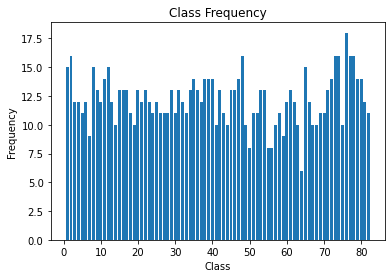

In [4]:
classes=final_df[['ID']].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

## Splitting data in training and validation(test) sets

In [0]:
train_size = len(final_df['ID'].unique()) * .8

In [0]:
train = pd.DataFrame()
valid = pd.DataFrame()
for n,i in enumerate(final_df['ID'].unique()):
    if n< train_size:
        train = pd.concat([train, final_df[final_df['ID']==i]])
    else:
        valid = pd.concat([valid, final_df[final_df['ID']==i]])

In [15]:
print(valid.shape,train.shape)

(212, 9) (790, 9)


In [16]:
print('Training Set Has: ' + str(len(train.groupby('ID').count())) + ' people')
print('Validation (Test) Set Has: ' + str(len(valid.groupby('ID').count())) + ' people')

Training Set Has: 66 people
Validation (Test) Set Has: 16 people


In [0]:
X_train = train[  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']]
y_train = train['AGE']

X_valid = valid[  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']]
y_valid = valid['AGE']

In [18]:
X_train.head(2)

,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index
0,0.806070,0.336661,0.390837,0.828399,0.521382,0.599030,0.346350
1,0.852819,0.442643,0.386980,0.774311,0.461004,0.659254,0.393676


In [0]:
y_valid=valid[['AGE']]

In [0]:
y_train=train[['AGE']]

In [55]:
print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape)

(790, 7) (790,) (212, 7) (212,)


## The Mean absolute error (MAE) for Kernel Regression model

In [0]:
kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=3,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3,2],
                              "gamma": np.logspace(-2, 2, 5),
                              "degree": [0,1,2,3,4]})

In [25]:
kr.fit(X_train, y_train)
print('MAE: ' + str(mean_absolute_error(y_true= y_valid, y_pred=kr.predict(X_valid))))

MAE: 10.235163852688649


### We have MAE=10.23 .Now we drop the features one by one and check whether our MAE increase or decrease?

In [0]:
kr_score_all_feats = mean_absolute_error(y_true= y_valid, y_pred=kr.predict(X_valid))

In [27]:
kernel_importance = list()
for feature in   ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']:
    print("Droping "+ feature)
    kr.fit(X_train.drop(feature,axis =1 ), y_train)
    kernel_importance.append(mean_absolute_error(y_true= y_valid, y_pred=kr.predict(X_valid.drop(feature,axis =1 )))-kr_score_all_feats)
    print('MAE: ' + str(mean_absolute_error(y_true= y_valid, y_pred=kr.predict(X_valid.drop(feature,axis =1 )))))
    print("Score decreased by : " +str(mean_absolute_error(y_true= y_valid, y_pred=kr.predict(X_valid.drop(feature,axis =1 ))) -kr_score_all_feats)) 


Droping Facial Index
MAE: 10.29189534344346
Score decreased by : 0.056731490754811986
Droping Mandibular Index
MAE: 10.25164599134319
Score decreased by : 0.016482138654541956
Droping Intercantal Index
MAE: 10.23404556839713
Score decreased by : -0.001118284291518279
Droping Orbital Width Index
MAE: 10.30901189029278
Score decreased by : 0.07384803760413128
Droping Eye Fissure Index
MAE: 10.419635908045885
Score decreased by : 0.18447205535723654
Droping Vermilion Height Index
MAE: 10.199300982034007
Score decreased by : -0.035862870654641554
Droping Mouth Face Width Index
MAE: 9.906054773428064
Score decreased by : -0.32910907926058464


### In above calculation,its observed that "Mouth Face Width Index"(-0.329) and "Vermilion Height Index" (-0.035) considerably increases the error.Therefore we drop both these features and check the MAE

In [28]:
kr.fit(X_train.drop(['Mouth Face Width Index','Vermilion Height Index'], axis=1), y_train)
print('MAE: ' + str(mean_absolute_error(y_true= y_valid, y_pred=kr.predict(X_valid.drop(['Mouth Face Width Index','Vermilion Height Index'], axis=1)))))


MAE: 9.775314445522065


### After dropping the two features i.e "Mouth Face Width Index" and "Vermilion Height Index", our MAE decreased from 10.23 to 9.77

# Using Polynomial Regression

In [29]:
poly_mod = Pipeline([('poly', PolynomialFeatures()), ('linear', LinearRegression(fit_intercept=True))])
poly = GridSearchCV(poly_mod, cv=3, param_grid={"poly__degree": [1,2,3,5]})
poly.fit(X_train,y_train)
print('MAE: ' + str(mean_absolute_error(y_true= y_valid, y_pred=poly.predict(X_valid))))

MAE: 10.273646554943682


In [0]:
poly_score_all_feats = mean_squared_error(y_true= y_valid, y_pred=poly.predict(X_valid))

### Dropping the features one by one and check the effect on MAE

In [31]:
poly_importance = list()
for feature in   ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']:
    print("Droping "+ feature)
    poly_mod = Pipeline([('poly', PolynomialFeatures()), ('linear', LinearRegression(fit_intercept=True))])
    poly = GridSearchCV(poly_mod, cv=5, param_grid={"poly__degree": [1,2,3,4]})
    poly.fit(X_train.drop(feature, axis=1),y_train)
    poly_importance.append(mean_absolute_error(y_true= y_valid, y_pred=poly.predict(X_valid.drop(feature,axis =1 )))-kr_score_all_feats)
    print('MAE: ' + str(mean_absolute_error(y_true= y_valid, y_pred=poly.predict(X_valid.drop(feature,axis =1 )))))
    print("Score decreased by : " +str(mean_absolute_error(y_true= y_valid, y_pred=poly.predict(X_valid.drop(feature,axis =1 ))) -kr_score_all_feats)) 


Droping Facial Index
MAE: 10.309421953838655
Score decreased by : 0.07425810115000608
Droping Mandibular Index
MAE: 10.326268685330312
Score decreased by : 0.09110483264166369
Droping Intercantal Index
MAE: 10.273238883022433
Score decreased by : 0.038075030333784454
Droping Orbital Width Index
MAE: 10.27256151393187
Score decreased by : 0.037397661243220526
Droping Eye Fissure Index
MAE: 10.427354741837732
Score decreased by : 0.19219088914908333
Droping Vermilion Height Index
MAE: 10.27333412410004
Score decreased by : 0.038170271411392065
Droping Mouth Face Width Index
MAE: 10.060304272049654
Score decreased by : -0.17485958063899432


### In the above procedure,its obsereved that after dropping 'Mouth Face Width Index' we see that MAE decreased for Polynomial regression
### Therefore we drop 'Mouth Face Width Index' feature and again check the MAE

In [32]:
poly.fit(X_train.drop('Mouth Face Width Index', axis =1),y_train)
print('MAE: ' + str(mean_absolute_error(y_true= y_valid, y_pred=poly.predict(X_valid.drop('Mouth Face Width Index', axis =1)))))

MAE: 10.060304272049654


### The MAE for polynomial model decreased from 10.27 to 10.06 after dropping "Mouth Face Width Index" feature

## Plotting the importance of features for Kernel and Polynomial models

In [0]:
importance_df = pd.DataFrame()
importance_df["Feature"] =   ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']

In [0]:
importance_df['Polynomial Importance'] = poly_importance
importance_df['Kernel Importance'] = kernel_importance


In [0]:
importance_df = importance_df.sort_values('Kernel Importance',ascending=False)

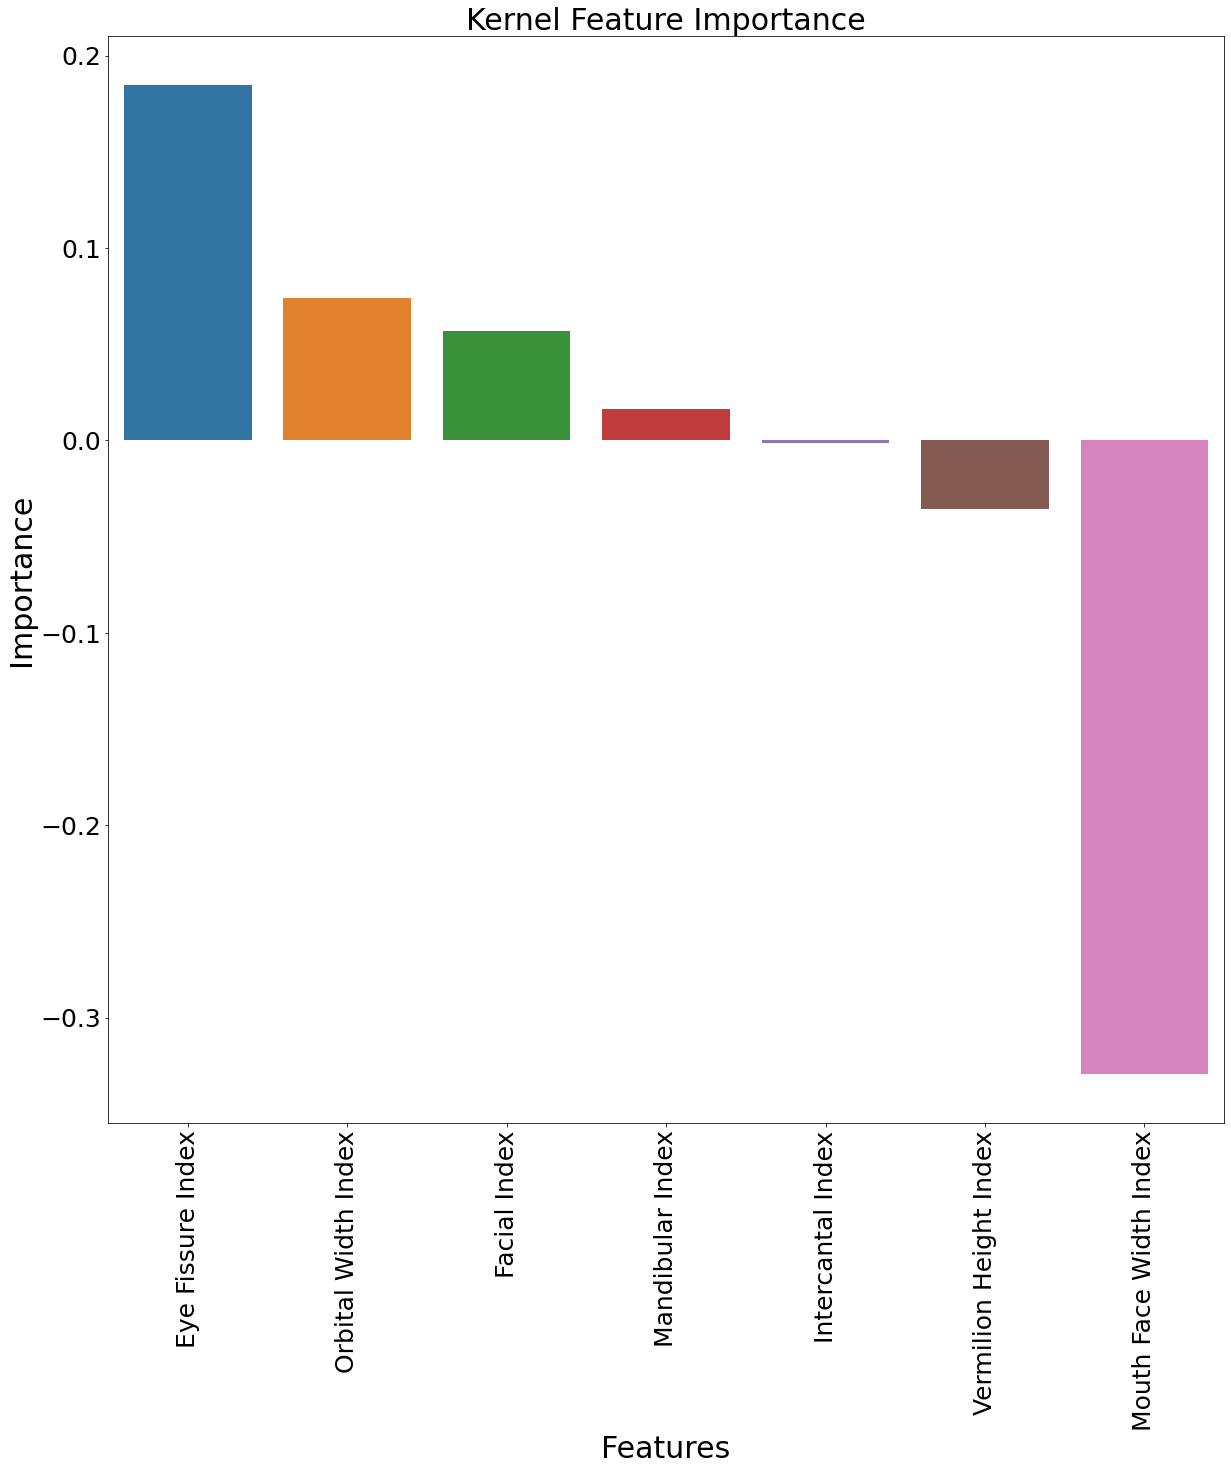

In [36]:
plt.figure(figsize=(20,20))
plt.title('Kernel Feature Importance', fontsize=30)
sns.barplot(importance_df.Feature, importance_df['Kernel Importance'])
plt.xticks(fontsize=25, rotation='vertical')
plt.yticks(fontsize=25)
plt.xlabel('Features',fontsize=30)
plt.ylabel('Importance', fontsize=30)
plt.show()

In [0]:
importance_df = importance_df.sort_values('Polynomial Importance',ascending=False)

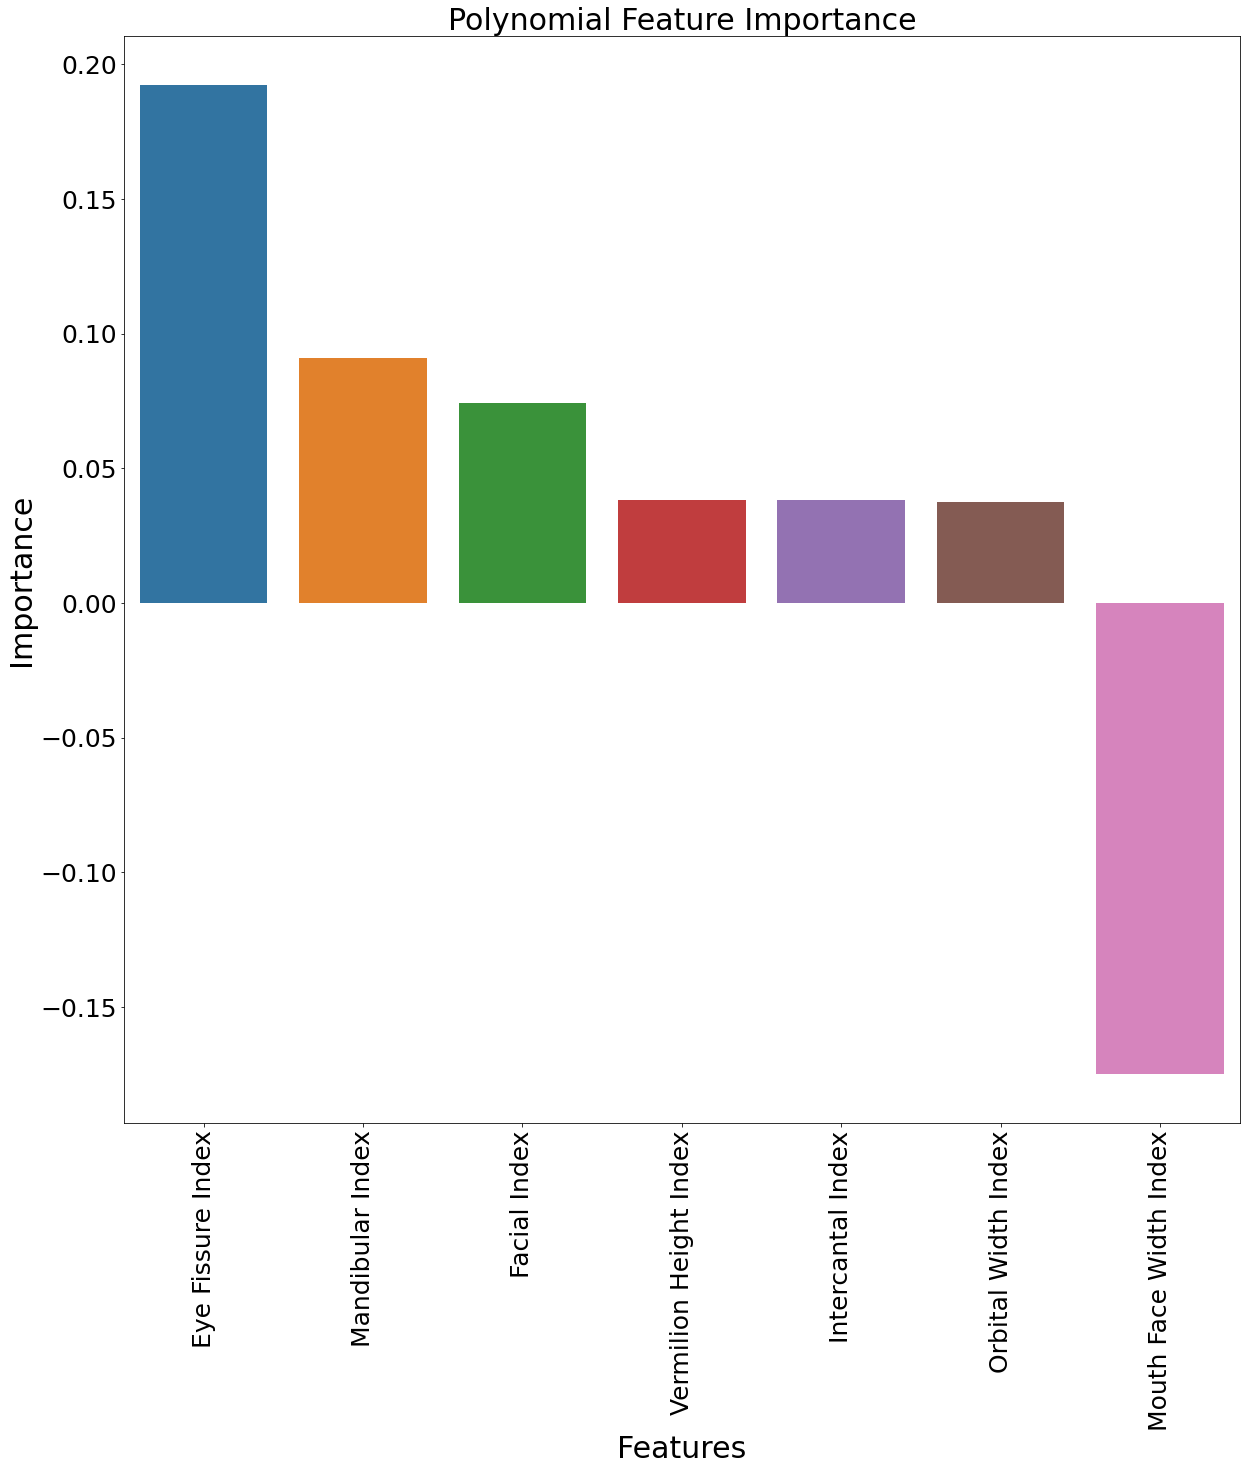

In [38]:
plt.figure(figsize=(20,20))
plt.title('Polynomial Feature Importance', fontsize=30)
sns.barplot(importance_df.Feature, importance_df['Polynomial Importance'])
plt.xticks(fontsize=25, rotation='vertical')
plt.yticks(fontsize=25)
plt.xlabel('Features',fontsize=30)
plt.ylabel('Importance', fontsize=30)
plt.show()

In [39]:
importance_df.head()

,Feature,Polynomial Importance,Kernel Importance
4,Eye Fissure Index,0.192191,0.184472
1,Mandibular Index,0.091105,0.016482
0,Facial Index,0.074258,0.056731
5,Vermilion Height Index,0.038170,-0.035863
2,Intercantal Index,0.038075,-0.001118


In [0]:
importance_df.to_csv('/content/drive/My Drive/Objective01/feature_importance_by_model.csv',index=False)

# Plotting the actual and predicted values using Polynomial and Kernel Regression

### dropping the 'Mouth Face Width Index'  feature for polynomial model and dropping 'Mouth Face Width Index','Vermilion Height Index' for Kernel Regression

In [0]:
valid['Polynomial Prediction'] = poly.predict(X_valid.drop(['Mouth Face Width Index'], axis=1))
valid['Kernel Prediction'] = kr.predict(X_valid.drop(['Mouth Face Width Index','Vermilion Height Index'], axis=1))

## New columns in the validation data to store the errors for Polynomial and Kernel regression errors

In [57]:
valid['AGE'].shape

(212,)

In [0]:
X_valid2=np.reshape(X_valid.values, (-1, 1))

In [67]:
X_valid.shape

(212, 7)

In [70]:
X_valid4 = np.reshape(X_valid.to_numpy(), (-1, 1))
X_valid4.shape

(1484, 1)

In [73]:
X_valid.shape

(212, 7)

In [0]:
out = np.empty(X_valid.shape[0], dtype=object)

In [0]:
a=pd.DataFrame(data=out)

In [82]:
X_valid.iloc[:,1].shape

(212,)

In [83]:
X_valid.columns

Index(['Facial Index', 'Mandibular Index', 'Intercantal Index',
       'Orbital Width Index', 'Eye Fissure Index', 'Vermilion Height Index',
       'Mouth Face Width Index'],
      dtype='object')

In [0]:
valid['Polynomial Error'] = abs(valid[['AGE']] -  poly.predict(X_valid.drop(['Mouth Face Width Index'], axis=1)))

In [0]:
valid['Kernel Error'] = abs(valid[['AGE']] -  kr.predict(X_valid.drop(['Mouth Face Width Index','Vermilion Height Index'], axis=1)))

## saving the results in csv

In [0]:
valid.to_csv('/content/drive/My Drive/Objective01/validation.csv',index=False)

## plotting the actual and predicted values for both the models

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


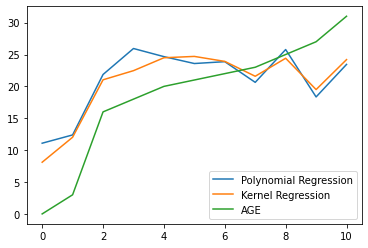

In [92]:
case1 = valid[valid['ID']==82]
case1['x'] = [i for i in range(len(case1))]

plt.plot(case1['x'], case1['Polynomial Prediction'])

plt.plot(case1['x'], case1['Kernel Prediction'])

plt.plot(case1['x'], case1['AGE'])
plt.legend(['Polynomial Regression','Kernel Regression', 'AGE'])
plt.show()

# Which Model is better

#### We see that Kernel Regression Model is slightly better thant the Polonomial model because it has a lower MSE value of 9.77

## Caculating the error for different age groups

In [0]:
error_by_age  = pd.DataFrame()

In [0]:
kernel_error = (valid.groupby(['AGE'])['Kernel Error'].sum()/valid.groupby(['AGE'])['Kernel Error'].count()).reset_index()

In [0]:
poly_error = (valid.groupby(['AGE'])['Polynomial Error'].sum()/valid.groupby(['AGE'])['Polynomial Error'].count()).reset_index()

In [0]:
errors_by_age = pd.merge(kernel_error, poly_error, how = 'inner', on = 'AGE')

In [0]:
errors_by_age.to_csv('/content/drive/My Drive/Objective01/errors_by_age_validation.csv',index=False)

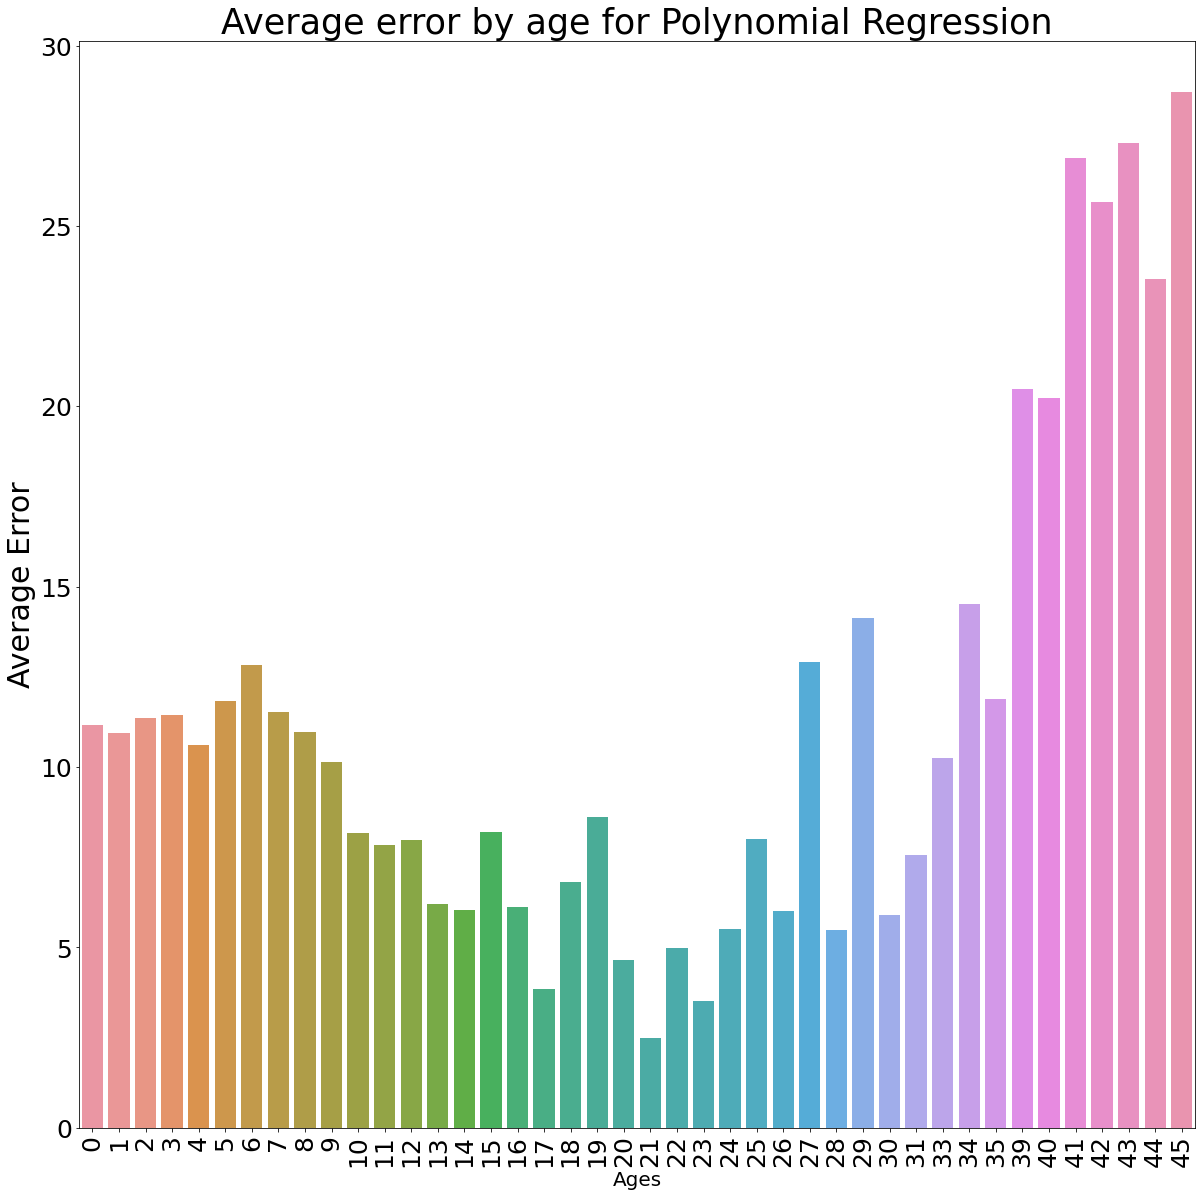

In [98]:
plt.figure(figsize=(20,20))
plt.title("Average error by age for Polynomial Regression", fontsize = 35)
sns.barplot(errors_by_age.AGE, errors_by_age['Polynomial Error'])
plt.xticks(fontsize=25, rotation='vertical')
plt.yticks(fontsize=25)
plt.xlabel('Ages',fontsize=20)
plt.ylabel('Average Error', fontsize=30)
plt.show()

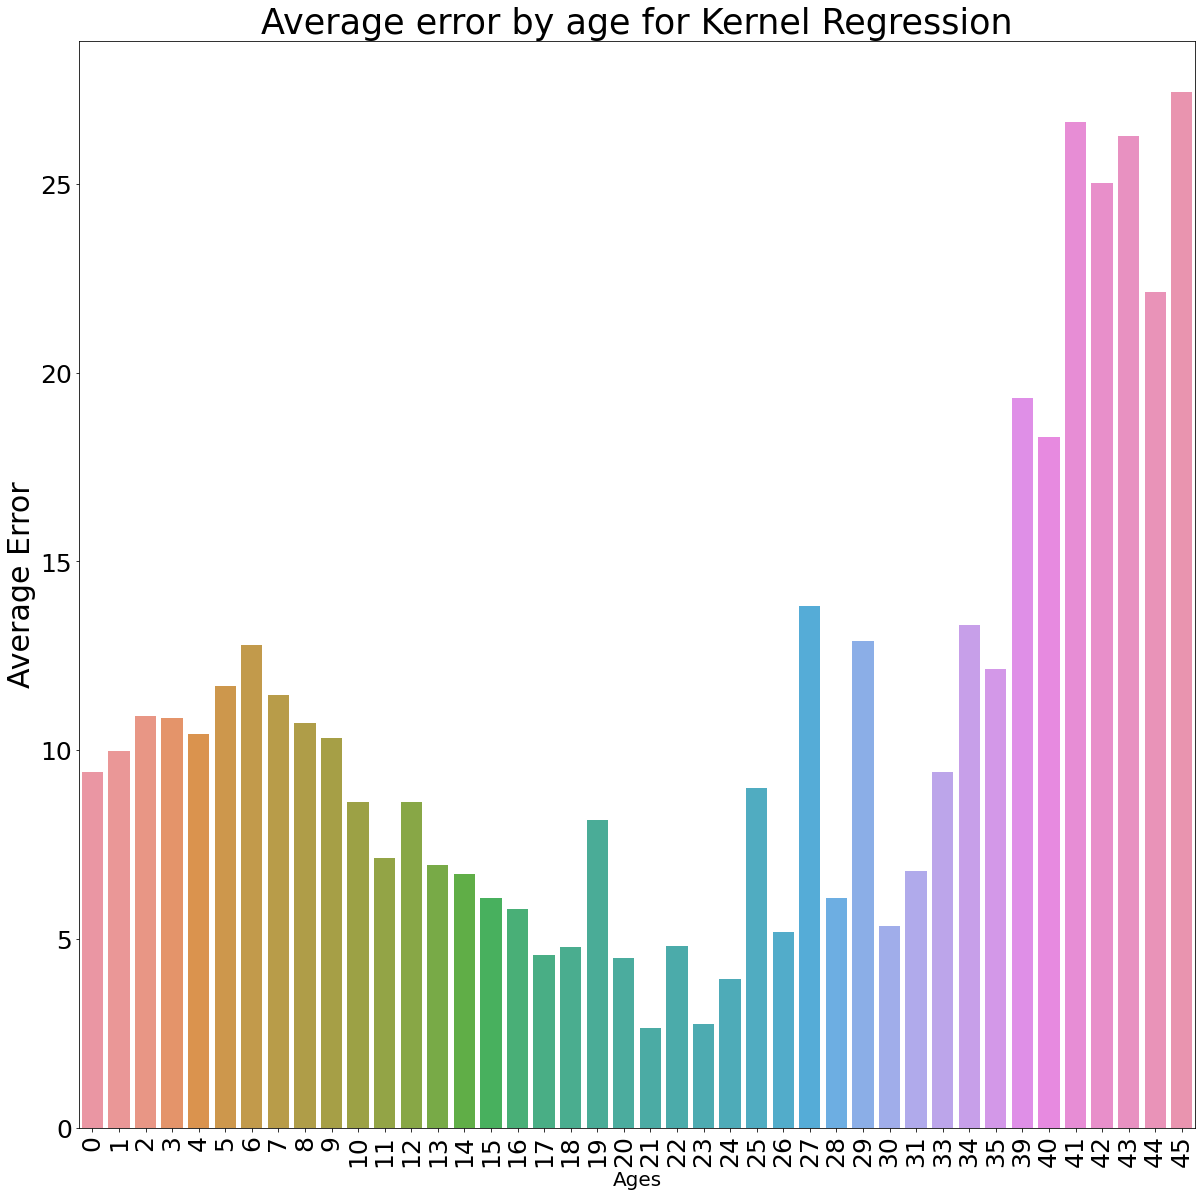

In [99]:
plt.figure(figsize=(20,20))
plt.title("Average error by age for Kernel Regression", fontsize = 35)
sns.barplot(errors_by_age.AGE, errors_by_age['Kernel Error'])
plt.xticks(fontsize=25, rotation='vertical')
plt.yticks(fontsize=25)
plt.xlabel('Ages',fontsize=20)
plt.ylabel('Average Error', fontsize=30)
plt.show()

# Why error is higher for  ages above 30

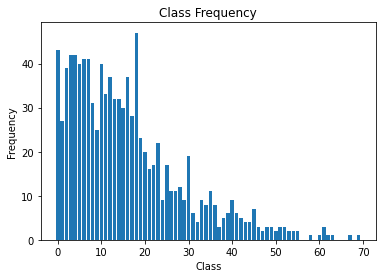

In [101]:
classes=final_df[['AGE']].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [100]:
errors_by_age

,AGE,Kernel Error,Polynomial Error
0,0,9.436822,11.172630
1,1,9.982546,10.936586
2,2,10.917162,11.352514
3,3,10.852491,11.456313
4,4,10.433735,10.616216
5,5,11.703382,11.836636
6,6,12.776663,12.823241
7,7,11.466327,11.519625
8,8,10.728369,10.984061
9,9,10.315623,10.129481


In [1]:
from keras.models import Sequential
"""Import from keras_preprocessing not from keras.preprocessing, 
because Keras may or maynot contain the features discussed here 
depending upon when you read this article, until the keras_
preprocessed library is updated in Keras use the github version."""
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
import os ,PIL
import matplotlib.pyplot as plt


Using TensorFlow backend.
